# Author - SANGRAM MEHER

# Technohacks Edutech  (Batch - 9)

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from scipy.stats import norm
from scipy import stats


# READING AND UNDERSTANDING OUR DATA 

In [8]:
employee = pd.read_csv("C:\\EmployeeSampleData\\Employee Sample Data.csv",encoding='ISO-8859-1')

In [9]:
employee.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,4/8/2016,"$141,604",15%,United States,Seattle,10/16/2021
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,11/29/1997,"$99,975",0%,China,Chongqing,NaN
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,10/26/2006,"$163,099",20%,United States,Chicago,NaN
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,9/27/2019,"$84,913",7%,United States,Chicago,NaN
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,11/20/1995,"$95,409",0%,United States,Phoenix,NaN


## From above data we know some attributes have invalid names . We are going to change these name .

In [10]:
employee.rename(columns={"Full Name":"Name","Job Title":"job_title","Business Unit":"Business_unit","Hire Date":"Hire_date","Annual Salary":"Annual_salary","Bonus %":"Bonus","Exit Date":"Exite_date"},inplace=True)

In [11]:
employee

,EEID,Name,job_title,Department,Business_unit,Gender,Ethnicity,Age,Hire_date,Annual_salary,Bonus,Country,City,Exite_date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,4/8/2016,"$141,604",15%,United States,Seattle,10/16/2021
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,11/29/1997,"$99,975",0%,China,Chongqing,NaN
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,10/26/2006,"$163,099",20%,United States,Chicago,NaN
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,9/27/2019,"$84,913",7%,United States,Chicago,NaN
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,11/20/1995,"$95,409",0%,United States,Phoenix,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,9/18/2016,"$98,427",0%,United States,Columbus,NaN
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,5/31/2010,"$47,387",0%,China,Chengdu,1/8/2018
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,6/10/2019,"$176,710",15%,United States,Miami,NaN
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,1/28/2012,"$95,960",0%,China,Chengdu,NaN


In [13]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EEID           1000 non-null   object
 1   Name           1000 non-null   object
 2   job_title      1000 non-null   object
 3   Department     1000 non-null   object
 4   Business_unit  1000 non-null   object
 5   Gender         1000 non-null   object
 6   Ethnicity      1000 non-null   object
 7   Age            1000 non-null   int64 
 8   Hire_date      1000 non-null   object
 9   Annual_salary  1000 non-null   object
 10  Bonus          1000 non-null   object
 11  Country        1000 non-null   object
 12  City           1000 non-null   object
 13  Exite_date     85 non-null     object
dtypes: int64(1), object(13)
memory usage: 109.5+ KB


In [14]:
employee.Annual_salary=employee.Annual_salary.str.strip('$')

In [15]:
employee["Annual_salary"]

0      141,604 
1       99,975 
2      163,099 
3       84,913 
4       95,409 
         ...   
995     98,427 
996     47,387 
997    176,710 
998     95,960 
999    216,195 
Name: Annual_salary, Length: 1000, dtype: object

In [16]:
employee["Annual_salary"]=employee["Annual_salary"].replace({',':''},regex=True)

In [17]:
employee["Annual_salary"]

0      141604 
1       99975 
2      163099 
3       84913 
4       95409 
        ...   
995     98427 
996     47387 
997    176710 
998     95960 
999    216195 
Name: Annual_salary, Length: 1000, dtype: object

In [18]:
employee["Bonus"]=employee["Bonus"].replace({'%':''},regex=True)

In [19]:
employee["Bonus"]

0      15 
1       0 
2      20 
3       7 
4       0 
      ... 
995     0 
996     0 
997    15 
998     0 
999    31 
Name: Bonus, Length: 1000, dtype: object

## Changing both coloums from object to int

In [20]:
employee['Bonus']=employee['Bonus'].astype(str).astype(int)

In [21]:
employee['Annual_salary']=employee['Annual_salary'].astype(str).astype(int)

In [22]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EEID           1000 non-null   object
 1   Name           1000 non-null   object
 2   job_title      1000 non-null   object
 3   Department     1000 non-null   object
 4   Business_unit  1000 non-null   object
 5   Gender         1000 non-null   object
 6   Ethnicity      1000 non-null   object
 7   Age            1000 non-null   int64 
 8   Hire_date      1000 non-null   object
 9   Annual_salary  1000 non-null   int32 
 10  Bonus          1000 non-null   int32 
 11  Country        1000 non-null   object
 12  City           1000 non-null   object
 13  Exite_date     85 non-null     object
dtypes: int32(2), int64(1), object(11)
memory usage: 101.7+ KB


In [23]:
employee['Bonus'].describe()

count    1000.000000
mean        8.866000
std        11.785625
min         0.000000
25%         0.000000
50%         0.000000
75%        15.000000
max        40.000000
Name: Bonus, dtype: float64

In [24]:
employee['Annual_salary'].describe()

count      1000.000000
mean     113217.365000
std       53545.985644
min       40063.000000
25%       71430.250000
50%       96557.000000
75%      150782.250000
max      258498.000000
Name: Annual_salary, dtype: float64

### Annual_salary and Bonus attribute are changed into int32

# Task-1 : Remove Duplication 

### Exit_date have null values . In this attribute we can fill "working" on the place of Nan or we can remove this attribute.

In [29]:
duplicate = employee[employee.duplicated(['EEID'])]
duplicate.head()

,EEID,Name,job_title,Department,Business_unit,Gender,Ethnicity,Age,Hire_date,Annual_salary,Bonus,Country,City,Exite_date
148,E01499,Elias Zhang,Solutions Architect,IT,Research & Development,Male,Asian,54,7/13/2013,83639,0,China,Beijing,NaN
158,E02166,Lucas Thomas,Manager,Accounting,Research & Development,Male,Caucasian,55,4/28/2000,115798,5,United States,Miami,NaN
159,E00431,Skylar Doan,Sr. Business Partner,Human Resources,Research & Development,Female,Asian,58,8/21/1994,93102,0,United States,Seattle,12/13/2013
185,E00671,Miles Cho,Systems Analyst,IT,Speciality Products,Male,Asian,47,3/10/1999,49404,0,China,Beijing,NaN
269,E01525,Charlotte Ruiz,Computer Systems Manager,IT,Manufacturing,Female,Latino,32,10/2/2017,61886,9,Brazil,Rio de Janerio,NaN


## EEID attribute have duplicate values . Before removing duplicate values we can check this for all rows

In [30]:
duplicate = employee[employee.duplicated()]
duplicate

,EEID,Name,job_title,Department,Business_unit,Gender,Ethnicity,Age,Hire_date,Annual_salary,Bonus,Country,City,Exite_date


### All row are Distinct

In [31]:
employee.loc[employee['EEID']=='E01499']

,EEID,Name,job_title,Department,Business_unit,Gender,Ethnicity,Age,Hire_date,Annual_salary,Bonus,Country,City,Exite_date
71,E01499,Jade Rojas,Director,Finance,Speciality Products,Female,Latino,37,1/28/2019,165927,20,United States,Phoenix,NaN
148,E01499,Elias Zhang,Solutions Architect,IT,Research & Development,Male,Asian,54,7/13/2013,83639,0,China,Beijing,NaN
522,E01499,Liam Jordan,Computer Systems Manager,IT,Manufacturing,Male,Caucasian,28,8/8/2020,73255,9,United States,Phoenix,NaN


### From above both rows have same EEID value but diffrent data values

# Task-2 : Perform Data Cleaning  

In [32]:
employee.isnull().sum()

EEID               0
Name               0
job_title          0
Department         0
Business_unit      0
Gender             0
Ethnicity          0
Age                0
Hire_date          0
Annual_salary      0
Bonus              0
Country            0
City               0
Exite_date       915
dtype: int64

# Only Exite_Date have 915 null values

In [33]:
employee['Exite_date'].fillna('working',inplace=True)

In [34]:
employee['Exite_date']

0      10/16/2021
1         working
2         working
3         working
4         working
          ...    
995       working
996      1/8/2018
997       working
998       working
999       working
Name: Exite_date, Length: 1000, dtype: object

In [35]:
employee['Exite_date'].value_counts()

working       915
7/17/2020       2
5/1/2021        2
4/22/2006       1
6/9/2020        1
             ... 
10/11/1998      1
10/3/2016       1
4/24/2020       1
4/14/2005       1
1/8/2018        1
Name: Exite_date, Length: 84, dtype: int64

## Finding outlier  

### There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots.

##  Uni-variate Analysis

<AxesSubplot:xlabel='Annual_salary'>

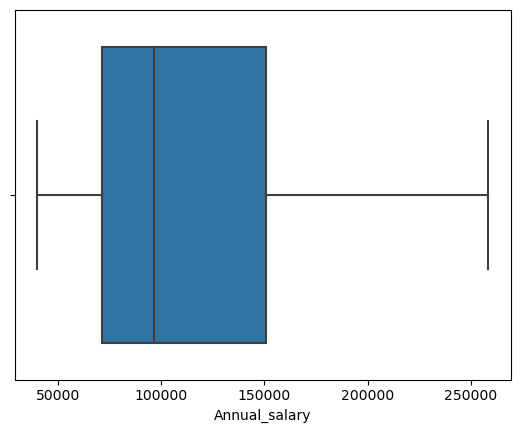

In [36]:
sns.boxplot(x=employee['Annual_salary'])

### No outliers in Annual_salary attribute.

<AxesSubplot:xlabel='Bonus'>

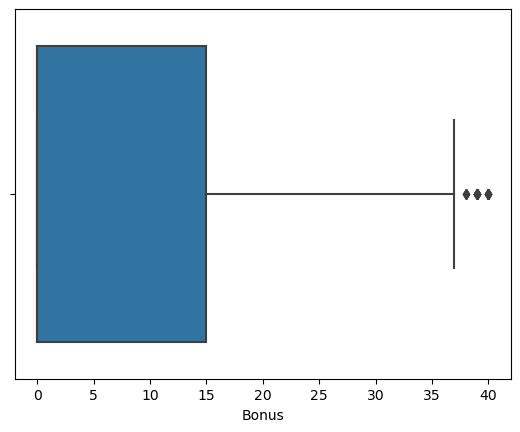

In [37]:
sns.boxplot(x=employee['Bonus'])

## Three data points are outside of our box plots in the 'Bonus' . These points are can be actual true data points and do not need to be removed. So, first we will check correlation with others, then we will remove the outliers, which will be required to be removed.

<AxesSubplot:xlabel='Age'>

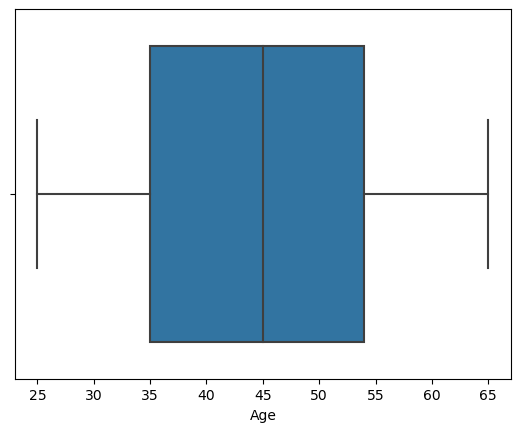

In [38]:
sns.boxplot(x=employee['Age'])

### No outliers in Age attribute.

# Bi-variate Analysis

### We will look at the bi-variate analysis of the two features.

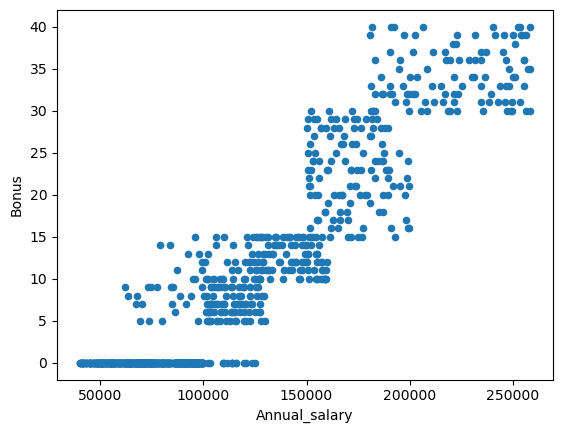

In [39]:
price_area = employee.plot.scatter(x='Annual_salary',
                      y='Bonus')

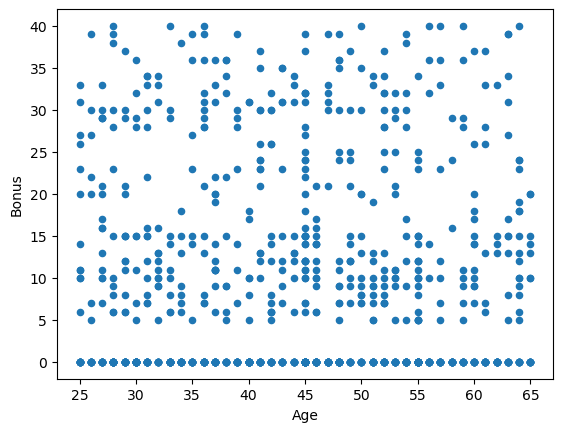

In [40]:
price_area = employee.plot.scatter(x='Age',
                      y='Bonus')

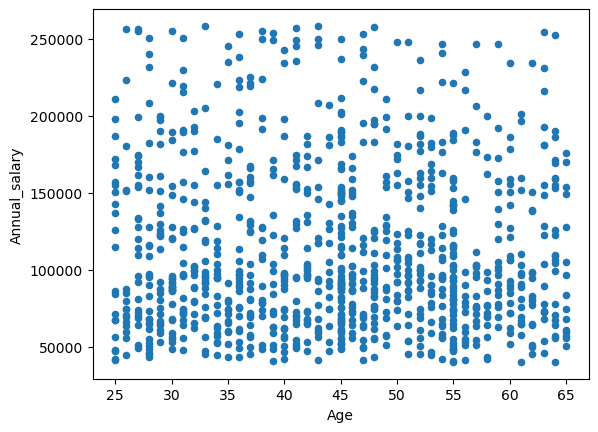

In [41]:
price_area = employee.plot.scatter(x='Age',
                      y='Annual_salary')

In [42]:
employee.corr()['Annual_salary']['Bonus']

0.9256920811233

In [43]:
employee.corr()['Annual_salary']['Age']

-0.02349746756294631

In [44]:
employee.corr()['Bonus']['Age']

-0.015555126705960634

### Bonus have correlation nearby 0.93 with annual_salary. So, we don't need to remove outlier from Bonus.Age don't have outliers but this have negative correlation with both Annual salary and Bonus. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

# Task-3 : Visualization using Histogram

array([[<AxesSubplot:title={'center':'Annual_salary'}>]], dtype=object)

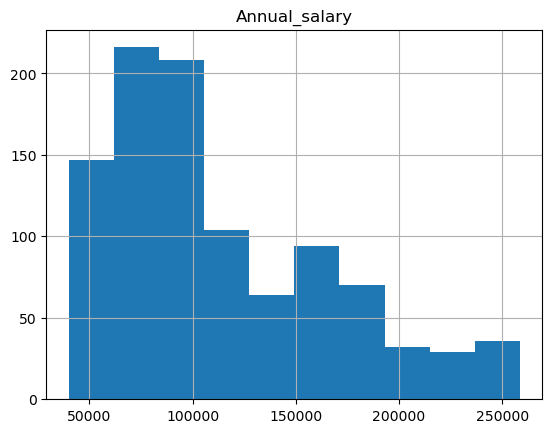

In [47]:
employee.hist(column='Annual_salary')

array([[<AxesSubplot:title={'center':'Bonus'}>]], dtype=object)

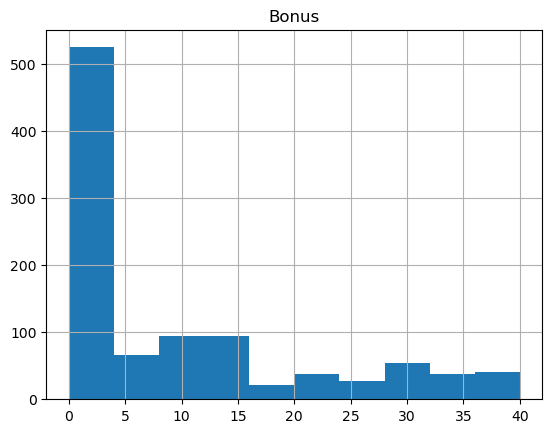

In [48]:
employee.hist(column='Bonus')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

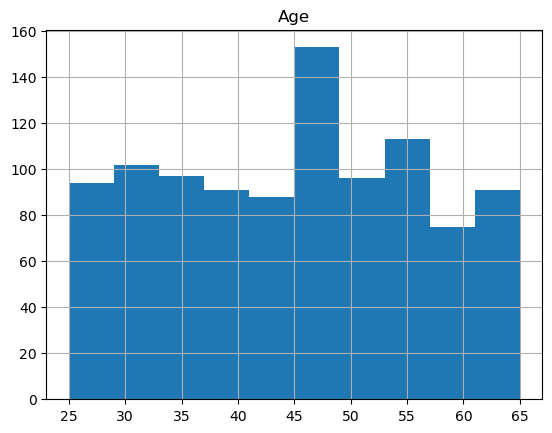

In [49]:
employee.hist(column='Age')

In [50]:
employee["Department"].value_counts()

IT                 241
Engineering        158
Sales              140
Human Resources    125
Finance            120
Marketing          120
Accounting          96
Name: Department, dtype: int64

# Task-4 : Calculate Summary Statistics
### Mean, Median , Standard Deviation , Min , Max , 25% , 50% , 75%

In [51]:
employee.describe()

,Age,Annual_salary,Bonus
count,1000.000000,1000.000000,1000.000000
mean,44.382000,113217.365000,8.866000
std,11.246981,53545.985644,11.785625
min,25.000000,40063.000000,0.000000
25%,35.000000,71430.250000,0.000000
50%,45.000000,96557.000000,0.000000
75%,54.000000,150782.250000,15.000000
max,65.000000,258498.000000,40.000000


# THANK YOU Team Technohacks Edutech for the opportunity to work.
